In [1]:
import requests
import os
import numpy as np
import matplotlib
from genericdlmodel import Model, Layer, FinalLayer, Activation
%matplotlib widget

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0"
}
request_opts = {
    "headers": headers,
    "params": {"raw":"true"}
}

In [3]:
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
fname = "mnist.npz"
fpath = os.path.join(data_dir, fname)
if not os.path.exists(fpath):
    print('Downloading file: ' + fname)
    resp = requests.get(base_url + fname, stream = True, **request_opts)
    resp.raise_for_status()
    with open(fpath, "wb") as fh:
        for chunk in resp.iter_content(chunk_size=128):
            fh.write(chunk)

In [4]:
data_file = np.load(fpath)
x_train = data_file["x_train"]
x_test = data_file["x_test"]
y_train = data_file["y_train"]
y_test = data_file["y_test"]
data_file.close()

In [5]:
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

In [6]:
sample_size = int(len(x_train))
test_split = 5 * sample_size // 6
seed = 1234
rng = np.random.default_rng(seed=seed)
index = rng.choice(len(x_train), sample_size)
train_sample_X = x_train[index[:test_split]]
val_sample_X = x_train[index[test_split:]]
train_sample_y = y_train[index[:test_split]]
val_sample_y = y_train[index[test_split:]]

In [7]:
train_sample_X = train_sample_X * 1.0 / 255
val_sample_X = val_sample_X * 1.0 / 255
test_sample_X = x_test * 1.0 / 255

In [8]:
def one_hot_encoding(labels, dim=10):
    one_hot_labels = labels[..., None] == np.arange(dim)[None]
    return one_hot_labels.astype(np.float64)

In [9]:
train_sample_labels = one_hot_encoding(train_sample_y)
val_sample_labels = one_hot_encoding(val_sample_y)
test_sample_labels = one_hot_encoding(y_test)

In [10]:
learning_rate = 0.1
epochs = 20
pixels_per_image = 28 * 28
num_labels = 10
batch_size = 100
dropout = 0.45
hidden_layer_sizes = [200,50]

In [11]:
model = Model(rng=rng,
              training_data_X=train_sample_X,
              training_data_y=train_sample_labels,
              val_data_X=val_sample_X,
              val_data_y=val_sample_labels,
              objective_function='categoricalcrossentropy',
              learning_rate=learning_rate,
              epochs=epochs,
              batch_size=batch_size
             )

In [12]:
for output_size in hidden_layer_sizes:
    model.add_layer(output_size=output_size,
                    func_name='relu',
                    dropout=dropout
                   )
model.add_final_layer()

In [13]:
model.run()

Epoch: 0
  Training loss:          21.409
  Training accuracy:      0.340
  Validation loss:        17.978
  Validation accuracy:    0.475

Epoch: 1
  Training loss:          19.083
  Training accuracy:      0.531
  Validation loss:        16.539
  Validation accuracy:    0.586

Epoch: 2
  Training loss:          18.714
  Training accuracy:      0.617
  Validation loss:        16.724
  Validation accuracy:    0.649

Epoch: 3
  Training loss:          18.789
  Training accuracy:      0.665
  Validation loss:        16.887
  Validation accuracy:    0.682

Epoch: 4
  Training loss:          18.855
  Training accuracy:      0.704
  Validation loss:        16.624
  Validation accuracy:    0.714

Epoch: 5
  Training loss:          19.031
  Training accuracy:      0.726
  Validation loss:        16.240
  Validation accuracy:    0.731

Epoch: 6
  Training loss:          19.275
  Training accuracy:      0.748
  Validation loss:        16.815
  Validation accuracy:    0.753

Epoch: 7
  Training 

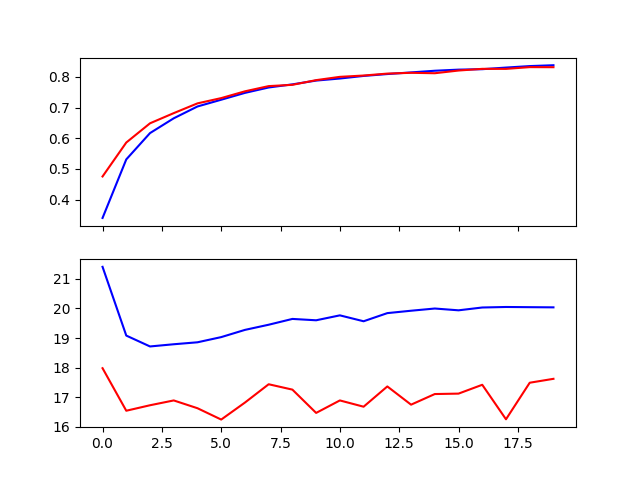

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
fig, axs = subplots(2, sharex='col')
x = np.arange(epochs)
y1 = model.training_acc
y2 = model.training_loss
y3 = model.val_acc
y4 = model.val_loss
axs[0].plot(x,y1,'b-')
axs[1].plot(x,y2,'b-')
axs[0].plot(x,y3,'r-')
axs[1].plot(x,y4,'r-')

In [15]:
layer1 = model.layers[0]
layer2 = model.layers[1]
layer3 = model.layers[2]

In [16]:
layer1.weights.shape,layer2.weights.shape, layer3.weights.shape


((784, 200), (200, 50), (50, 10))

In [17]:
U1,S1,V1 = np.linalg.svd(layer1.weights)
U2, S2, V2 = np.linalg.svd(layer2.weights)
U3, S3, V3 = np.linalg.svd(layer3.weights)

In [18]:
S1,S2,S3

(array([2.61784776, 2.49389605, 2.46328341, 2.4023419 , 2.38184888,
        2.35598135, 2.34359603, 2.32371298, 2.31658929, 2.30618127,
        2.29753695, 2.26097403, 2.23689227, 2.22960589, 2.21570348,
        2.21153   , 2.19464063, 2.17160117, 2.154126  , 2.14563364,
        2.14103657, 2.12720343, 2.12053287, 2.11383777, 2.10002843,
        2.09370794, 2.08266391, 2.07815889, 2.07184707, 2.05313952,
        2.04252995, 2.03030123, 2.0274301 , 2.01964141, 2.00918387,
        1.99425347, 1.99070549, 1.98017819, 1.97726286, 1.97369714,
        1.96971123, 1.95984041, 1.94946228, 1.94110303, 1.9219322 ,
        1.91664552, 1.91213215, 1.90371918, 1.89390106, 1.88226671,
        1.88156345, 1.87621871, 1.87196006, 1.86790845, 1.85613329,
        1.84780835, 1.83556552, 1.82622572, 1.82024432, 1.80900439,
        1.80329343, 1.80051446, 1.79642507, 1.79100584, 1.78020545,
        1.77264736, 1.76877148, 1.76335882, 1.76058105, 1.7421702 ,
        1.73752102, 1.73458385, 1.73006578, 1.72

Now take the top 10% of each singular values from each weight matrix

In [22]:
top = [20,5,1]
new_S1 = S1[:top[0]]
new_S2 = S2[:top[1]]
new_S3 = S3[:top[2]]
new_W1 = U1[:,:top[0]] @ np.diag(new_S1) @ V1[:top[0],:]
new_W2 = U2[:,:top[1]] @ np.diag(new_S2) @ V2[:top[1],:]
new_W3 = U3[:,:top[2]] @ np.diag(new_S3) @ V3[:top[2],:]

In [23]:
new_W1.shape, model.layers[0].weights.shape

((784, 200), (784, 200))

In [ ]:
model.layers[0].init_weights(new_W1)